Text(0, 0.5, 'Amplitude')

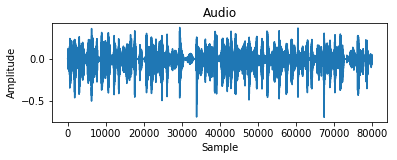

In [1]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import string
import pandas as pd
import glob 
import os
import random
import librosa
import IPython
import librosa.display
import cv2
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot
from scipy.io import wavfile

# Read the wav file (mono)
file_name = os.path.join("SSPNet-Speaker-Personality-Corpus/Audio_clips", 'cut_feb0101-guest-0-2' + '.wav')
signalData, samplingFrequency = librosa.load(file_name, res_type='kaiser_fast',sr=8000,mono=True) 

# Plot the signal read from wav file

plot.subplot(211)
plot.title('Audio')
plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')



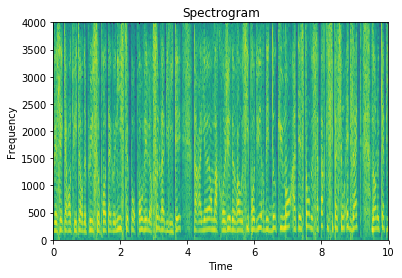

In [2]:
plot.specgram(signalData,Fs=samplingFrequency)
plot.title('Spectrogram')
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.show()
IPython.display.Audio(file_name)

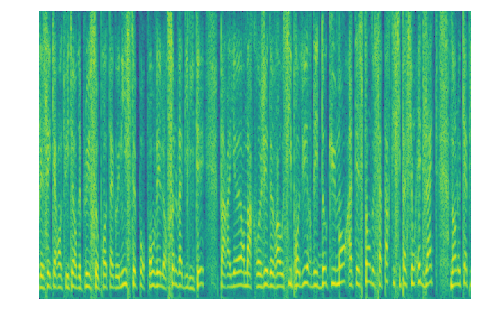

In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np

def graph_spectrogram(wav_file):
    rate, data = wavfile.read(file_name)
    fig,ax = plt.subplots(1)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    ax.axis('off')
    pxx, freqs, bins, im = ax.specgram(x=data, Fs=rate, noverlap=384, NFFT=512)
    ax.axis('off')
    fig.savefig('sp_xyz.png', dpi=300, frameon='false')

if __name__ == '__main__':
    graph_spectrogram('file_name')

In [4]:
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
rgb_img = imread('sp_xyz.png')
gray_img = cv2.imread('sp_xyz.png', cv2.IMREAD_GRAYSCALE)
# Now normalize gray image
norm_image = cv2.normalize(gray_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

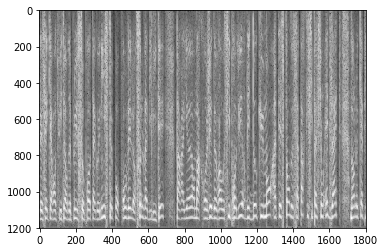

In [5]:
plt.imshow(norm_image, cmap='gray')

In [21]:
from sklearn.feature_extraction import image
# Use the array data from the first image in this dataset:
print('Image shape: {}'.format(norm_image.shape))
patches = image.extract_patches_2d(norm_image, (50, 50), max_patches=0.5)
print('Patches shape: {}'.format(patches.shape))

Image shape: (1200, 1800)
Patches shape: (1007700, 50, 50)


In [67]:
d=patches[10].ravel()
print(d.shape)
d=d.reshape(20,125)

(2500,)


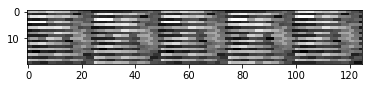

In [68]:
plt.imshow(d, cmap='gray')

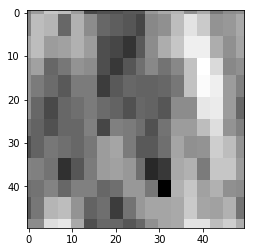

In [54]:
plt.imshow(patches[100], cmap='gray')

In [36]:
plt.hist?

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,  12.,   0.,   0.,
         12.,   0.,  12.,  15.,  36.,   0.,  30.,  30.,   0.,   0.,  27.,
         45.,   0.,  69.,  12.,   9.,   0.,  47.,  45.,   0.,  81., 101.,
          0.,   0.,  39.,  43.,  15.,   0.,  80.,  24.,   0.,  76.,  51.,
         31.,   0., 128.,  84.,  87.,   0.,  60., 109.,   0.,  60., 144.,
          0.,   0., 185.,  54.,   0., 

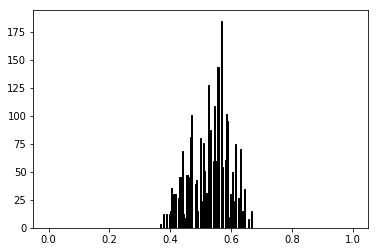

In [52]:
plt.hist(patches[107].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram